# Project: Investigate a Dataset - [Exploring Babies per Woman and other Factors]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

For this analysis, I have 4 different datasets. First, average babies per woman for each country for the years 1800-2100. 

Second, I have the Human Development Index (HDI). This index is a measurement of quality of life based on factors such as life expectancy or health level, education, and per capita income. The official Human Development Reports site explains the following: "The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable, and having a decent standard of living." It is scored from 0 to 1.0.

The third dataset I have included is the Happiness Score (WHR). In this survey, people in every country (where possible) answer the following: "Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?" The dataset has been converted to a 0-100 scale by GapMinder. 

The fourth and final dataset is the suicide rates per 100k people in each country (where this data was provided). 


### Question(s) for Analysis
My questions are centered around trends concerning the average babies per woman (ABPW) in each country. First, I was curious about what the trend line looked like globally for ABPW, Whether the trend was decreasing, increasing, or generally staying the same. I explored this trend line with 6 different countries as well. Next, I wanted to explore the correlations for ABPW and the factors of HDI, happiness score, and suicide rates. The logic behind using the happiness score and suicide rates comes from the desire to explore a subjective measure and objective measure. The happiness score is subjective person to person, but suicide rates are an objective measure. Thus a country's happiness score might be relatively high, but suicide rates may tell a different story about the mental health of a country. Addtionally, I had some hypotheses surrounding the trends I would see. I had previously believed countries with less income and generally a lower standard of living would have a higher ABPW. On the other hand, I speculated that these countries might have a generally happier people. This is possibly a poor speculation, but I wanted to explore it in this analysis with a subjective and objective measure. We will see what unfolds. 

### For correlational analyses, I will be exploring trends for three separate years for each dataset. For HDI, this will be 1990, 2005, and 2021. For the suicide dataset, this will be 1990, 2005, and 2014. The WHR dataset, has the shortest span of time for which data has been collected. To get a good idea of the trends for this dataset, I will use 2011, 2015, and 2022. These years in this dataset also contain more data values than the years 2005-2010, which is why we will start with 2011. 
 
 
 

In [294]:
# Importing packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats



%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In [295]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_babies = pd.read_csv('babies.csv',index_col="country")
df_happiness = pd.read_csv('happiness.csv', index_col="country")
df_suicide = pd.read_csv('suicide.csv', index_col="country")
df_hdi = pd.read_csv('humandevelopmentindex.csv', index_col="country")

First we will look at the top three rows of every dataset to see the span of time they cover. We will also look at dataframe information, specifically the data types but also the number of columns as this is the number of countries included.

In [23]:
df_babies.head(3)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Aruba,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,...,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.83,1.83
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40


In [105]:
df_babies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, Aruba to Zimbabwe
Columns: 301 entries, 1800 to 2100
dtypes: float64(301)
memory usage: 484.7+ KB


In [24]:
df_happiness.head(3)

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
country,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,23.8,NaN,24.4,18.6
Angola,NaN,NaN,NaN,NaN,NaN,NaN,55.9,43.6,39.4,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,46.3,NaN,54.9,52.7,58.7,55.1,45.5,48.1,46.1,45.1,46.4,50.0,50.0,53.6,52.5,52.8


In [ ]:
df_happiness.info()

In [25]:
df_suicide.head(3)

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.06,5.34,NaN,3.08,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.74,NaN,NaN,NaN,2.39,1.92,1.54,2.02,1.85


In [ ]:
df_suicide.info()

In [26]:
df_hdi.head(3)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.273,0.279,0.287,0.297,0.292,0.310,0.319,0.323,0.324,0.332,...,0.466,0.474,0.479,0.478,0.481,0.482,0.483,0.488,0.483,0.478
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.364,...,0.541,0.552,0.563,0.582,0.596,0.597,0.595,0.595,0.590,0.586
Albania,0.647,0.629,0.614,0.617,0.624,0.634,0.645,0.642,0.657,0.669,...,0.778,0.785,0.792,0.795,0.798,0.802,0.806,0.810,0.794,0.796


In [ ]:
df_hdi.info()


### Data Cleaning
#### All of our datasets are in the same format with the countries as the indexes, years in the column headings, and every dataset has the same data type. I will only be cleaning the data throughout the analyses when I extract data from the datasets or run statistical analyses. It is then I will drop the NaN values. At this point it does not make sense to do so in order to preserve the data because dropping the NaN values removes the entire country from the dataset.. If I were to drop all NaN values from df_happiness now, it would delete rows which have missing values for some years but there would still be data for the years I want to analyze. Not every dataset has every value in every column and row.  

#### Additionally, because all datatypes are float64, we do not need to convert any types in any dataset. 

<a id='eda'></a>
## Exploratory Data Analysis





## What are the trends over time for average babies per woman? 
#### This will be explored globally as well as comparing 6 different countries of historically different economic environments.

Looking at the world as a whole, I first want to explore, from 1800-2100, the trend line of average babies per woman.

In [106]:
#This code will give us the mean of each individual column 1800-2100. This is the GLOBAL average for EACH year.
df_mean_babies = df_babies.mean(axis=0)
df_mean_babies

1800    6.086832
1801    6.084010
1802    6.087030
1803    6.086089
1804    6.086386
          ...   
2096    1.875622
2097    1.873731
2098    1.871692
2099    1.869453
2100    1.869453
Length: 301, dtype: float64

<Axes: >

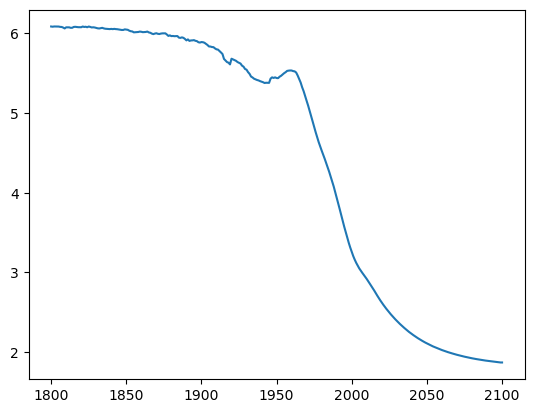

In [19]:
#Now we can show a line graph to see what the trend looks
df_mean_babies.plot.line()

We can see that the global trend for APBW is declining, and pretty rapidly. Next, we will compare two separate years: 1990 and 2020. Although we can clearly see the line is declining, it is interesting to note just how dramatic the decline is by comparing these two years. 

In [83]:
#Will give us the mean for 1990
babies90 = df_babies['1990'].mean()
babies90

3.9407920792079207

In [84]:
#This will give us the mean for 2020
babies22 = df_babies['2020'].mean()
babies22

2.6206965174129353

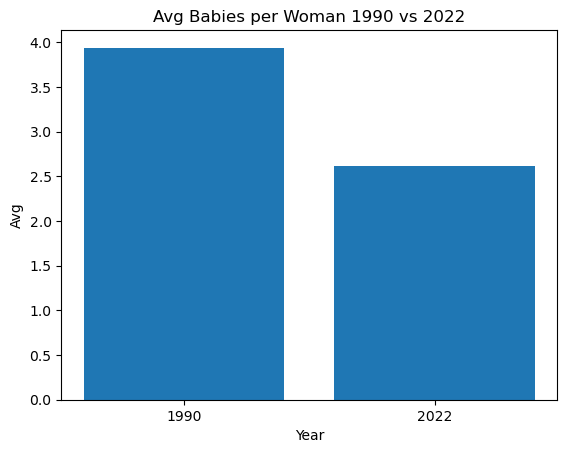

In [87]:
#Creating the bar chart to show the difference
locations = [1, 2]
heights = [babies90, babies22]
labels = ['1990', '2022']
plt.bar(locations, heights, tick_label=labels)
plt.title('Avg Babies per Woman 1990 vs 2022')
plt.xlabel('Year')
plt.ylabel('Avg');

Here, we compared two years: 1990 and 2022. Just 32 years apart and the average when down nearly 1.5. Which means on average, women are having 1.5 less babies now than in 1990. 

Next, I want to compare six different countries. USA, Sweden, South Korea, Singapore, South Sudan, and Somalia. The first two countries have historically been considered "First World". The second two, South Korea and Singapore, have successfully managed to rise as a "First World" country from "Third World". Lastly, South Sudan and Somalia are historically and currently "Third World" countries. Comparing these six countries will show us trend lines for three different types of countries in the world. 

In [107]:
#In order to show the years on the X axis and Average Babies on the y axis, we need to transpose the data 
    #so countries are the column headings.

df_babies2 = df_babies.transpose()
df_babies2

country,Aruba,Afghanistan,Angola,Albania,Netherlands Antilles,UAE,Argentina,Armenia,Antigua and Barbuda,Australia,...,St. Vincent and the Grenadines,Venezuela,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
1800,5.64,7.00,6.93,4.60,5.80,6.94,6.80,7.80,5.00,6.50,...,6.54,5.63,5.55,4.70,6.60,6.98,6.88,6.47,6.71,6.75
1801,5.64,7.00,6.93,4.60,5.80,6.94,6.80,7.80,5.00,6.48,...,6.54,5.63,5.55,4.70,6.60,6.98,6.88,6.47,6.71,6.75
1802,5.64,7.00,6.93,4.60,5.80,6.94,6.80,7.81,4.99,6.46,...,6.54,5.64,5.55,4.70,6.60,6.98,6.88,6.47,6.71,6.75
1803,5.64,7.00,6.93,4.60,5.80,6.94,6.80,7.81,4.99,6.44,...,6.54,5.64,5.55,4.70,6.60,6.98,6.88,6.47,6.71,6.75
1804,5.64,7.00,6.93,4.60,5.80,6.94,6.80,7.81,4.99,6.42,...,6.54,5.64,5.55,4.70,6.60,6.98,6.88,6.47,6.71,6.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,1.82,1.74,2.45,1.79,2.01,1.77,1.82,1.78,1.81,1.80,...,1.78,1.79,1.82,1.89,1.91,2.05,1.69,1.80,2.51,1.84
2097,1.82,1.74,2.43,1.79,2.01,1.77,1.82,1.78,1.81,1.80,...,1.78,1.79,1.82,1.89,1.90,2.04,1.70,1.80,2.50,1.83
2098,1.82,1.74,2.42,1.79,2.02,1.77,1.82,1.78,1.82,1.80,...,1.78,1.79,1.82,1.89,1.90,2.03,1.70,1.80,2.48,1.83
2099,1.83,1.74,2.40,1.79,2.02,1.77,1.82,1.78,1.82,1.81,...,1.78,1.79,1.82,1.89,1.89,2.02,1.70,1.80,2.46,1.83


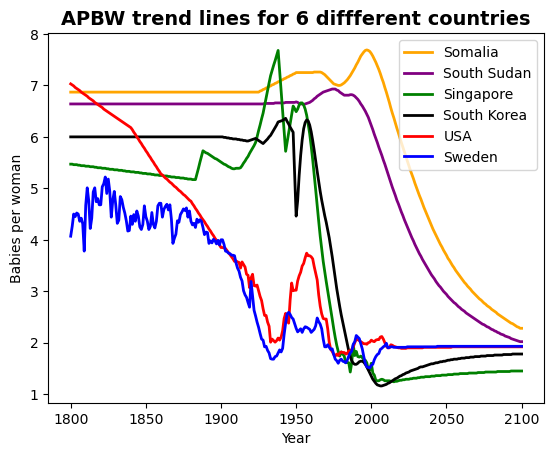

In [293]:
#Now we will create our line graph with the six countries previouslly mentioned

df_babies2['Somalia'].plot.line(color='orange',linewidth=2)
df_babies2['South Sudan'].plot.line(color='purple',linewidth=2)

df_babies2['Singapore'].plot.line(color='green',linewidth=2)
df_babies2['South Korea'].plot.line(color='black',linewidth=2)

df_babies2['USA'].plot.line(color='red',linewidth=2)
df_babies2['Sweden'].plot.line(color='blue',linewidth=2)



plt.title('APBW trend lines for 6 diffferent countries', fontsize = 14, weight = "bold")
plt.legend(loc='upper right')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Babies per woman', fontsize=10);

It is quite interesting to look at the similarities and differences between each line in this graph. Each of the two countries in the three different groups follow a similar pattern to each other. The two third world countries (Somalia and South Sudan) are steady, rise a bit near 2000, and then dramatically decrease. The two countries which have gone from third to first world (Singapore and South Korea) have a similar pattern also, both increasing around 1950 and steep declines thereafter. Our two first world countries, USA and Sweden decline until 1950 (this time period is known as the post-war baby boom leading to the "boomer" generation), and a decline afterwards. It is also interesting to note that the APBW for each country near 2100 are very close to each other. Could globalization lead to this? Technology increasing the quality of people's lives worldwide? Better access to healthcare? Interesting to speculate, but we won't be exploring any causal relationships in this analysis, so we can only speculate. 

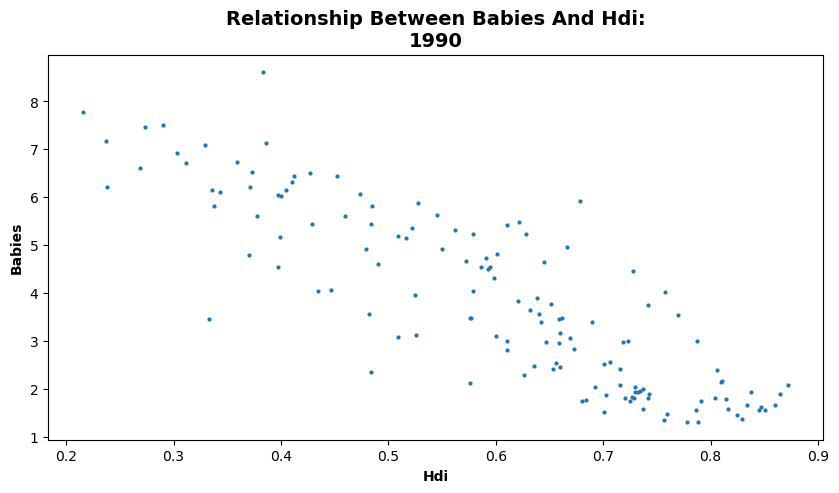

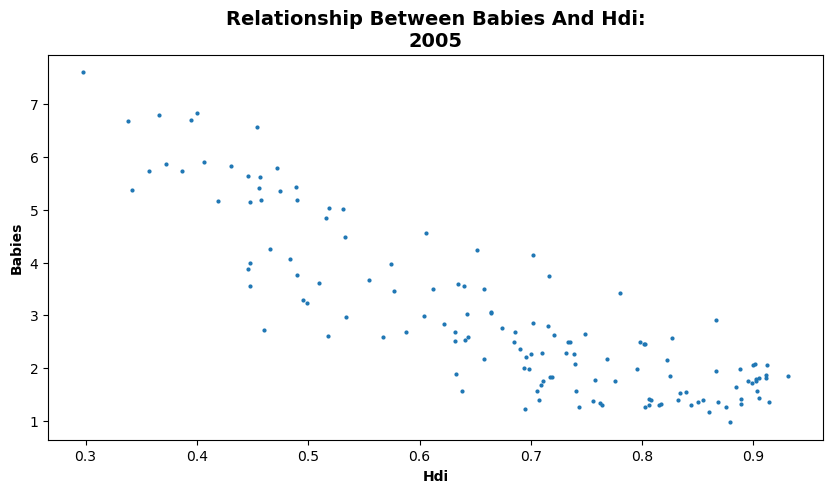

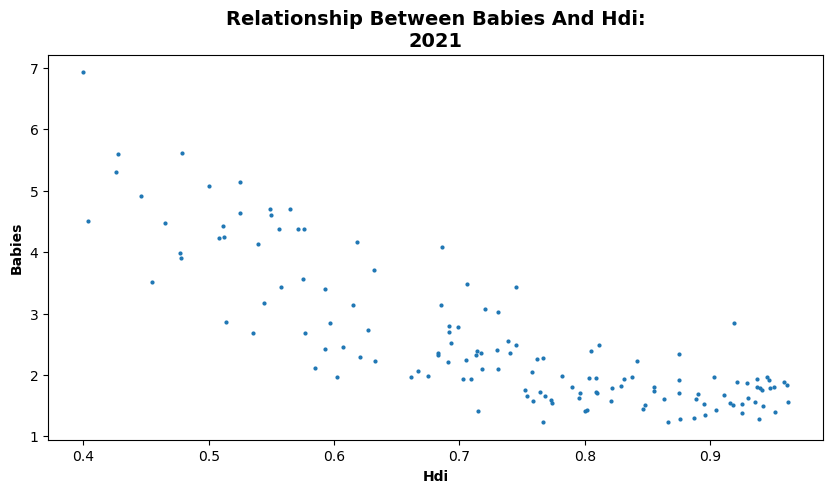

In [290]:
for decade, year in zip(['19', '20', '20'], ['90', '05', '21']):
    myScatterPlot(babies_hdi_all,f'hdi{year}',f'babies{year}', title=f':\n{decade}{year}')
    

Next I'm going to create a function before I get into the research questions. This function will reduce the redundant code of calling three separate scatter plots for each analysis. 

In [ ]:
def myScatterPlot(df,xVar,yVar,title=''):

    df.plot(kind='scatter',x=xVar,y=yVar,figsize=[10,5], s=4);
    
    xVar=xVar.replace("_", " ")[:-2]
    yVar=yVar.replace("_", " ")[:-2]
    
    plt.title(f'Relationship between {yVar} and {xVar}{title}'.title(), fontsize = 14, weight = "bold")
    plt.xlabel(xVar.title(), fontsize = 10, weight = "bold")
    plt.ylabel(yVar.title(), fontsize = 10, weight = "bold")

## What is the relationship between average babies per woman and the Human Development Index (HDI)?

Now we will explore the relationship between the Health Development Index and APBW. 

In [113]:
#First, we need to merge our two datasets
df_merge_babieshdi = df_babies.merge(df_hdi, left_index=True, right_index=True, how = 'inner')
df_merge_babieshdi

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y,2018_y,2019_y,2020_y,2021_y
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,0.466,0.474,0.479,0.478,0.481,0.482,0.483,0.488,0.483,0.478
Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,6.94,...,0.541,0.552,0.563,0.582,0.596,0.597,0.595,0.595,0.590,0.586
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,0.778,0.785,0.792,0.795,0.798,0.802,0.806,0.810,0.794,0.796
UAE,6.94,6.94,6.94,6.94,6.94,6.94,6.94,6.94,6.94,6.94,...,0.846,0.852,0.859,0.865,0.870,0.897,0.909,0.920,0.912,0.911
Argentina,6.80,6.80,6.80,6.80,6.80,6.80,6.80,6.80,6.80,6.80,...,0.843,0.845,0.846,0.848,0.847,0.851,0.850,0.852,0.840,0.842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,6.98,6.98,6.98,6.98,6.98,6.98,6.98,6.98,6.98,6.98,...,0.709,0.710,0.711,0.716,0.717,0.716,0.716,0.715,0.712,0.707
Yemen,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,...,0.512,0.513,0.505,0.477,0.467,0.459,0.459,0.461,0.460,0.455
South Africa,6.47,6.47,6.47,6.47,6.47,6.47,6.47,6.47,6.47,6.47,...,0.696,0.704,0.712,0.716,0.719,0.720,0.726,0.736,0.727,0.713


In [114]:
#Next, from the merged dataset, we pull the years we want for APBW and HDI
babies_hdi_all = df_merge_babieshdi[['1990_x','1990_y', '2005_x', '2005_y', '2021_x', '2021_y']].copy()
babies_hdi_all

,1990_x,1990_y,2005_x,2005_y,2021_x,2021_y
country,,,,,,
Afghanistan,7.47,0.273,6.83,0.400,3.90,0.478
Angola,7.25,NaN,6.47,0.447,5.34,0.586
Albania,2.98,0.647,1.75,0.711,1.70,0.796
UAE,4.45,0.728,2.15,0.822,1.67,0.911
Argentina,2.99,0.723,2.45,0.802,2.22,0.842
...,...,...,...,...,...,...
Samoa,5.12,NaN,4.46,0.701,3.74,0.707
Yemen,8.61,0.383,5.43,0.489,3.52,0.455
South Africa,3.65,0.632,2.68,0.632,2.33,0.713


In the dataframe above, we see the 6 columns we pulled from the merged dataset. the _x columns are the APBW columns and the _y columns are the HDI scores. Next, we will rename the columns so they are easier to read and make more sense.

In [115]:
babies_hdi_all.rename(columns={'1990_x': 'babies90', '1990_y': 'hdi90', '2005_x': 'babies05', '2005_y':'hdi05', '2021_x':'babies21', '2021_y':'hdi21'}, inplace=True)
babies_hdi_all

,babies90,hdi90,babies05,hdi05,babies21,hdi21
country,,,,,,
Afghanistan,7.47,0.273,6.83,0.400,3.90,0.478
Angola,7.25,NaN,6.47,0.447,5.34,0.586
Albania,2.98,0.647,1.75,0.711,1.70,0.796
UAE,4.45,0.728,2.15,0.822,1.67,0.911
Argentina,2.99,0.723,2.45,0.802,2.22,0.842
...,...,...,...,...,...,...
Samoa,5.12,NaN,4.46,0.701,3.74,0.707
Yemen,8.61,0.383,5.43,0.489,3.52,0.455
South Africa,3.65,0.632,2.68,0.632,2.33,0.713


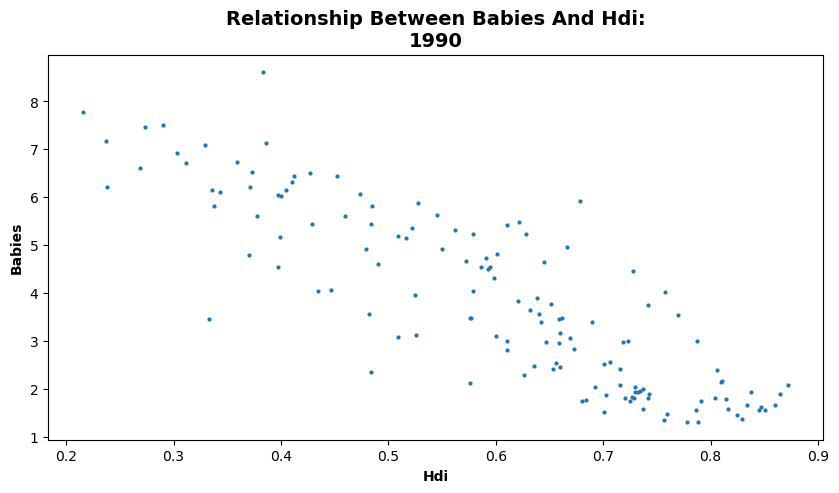

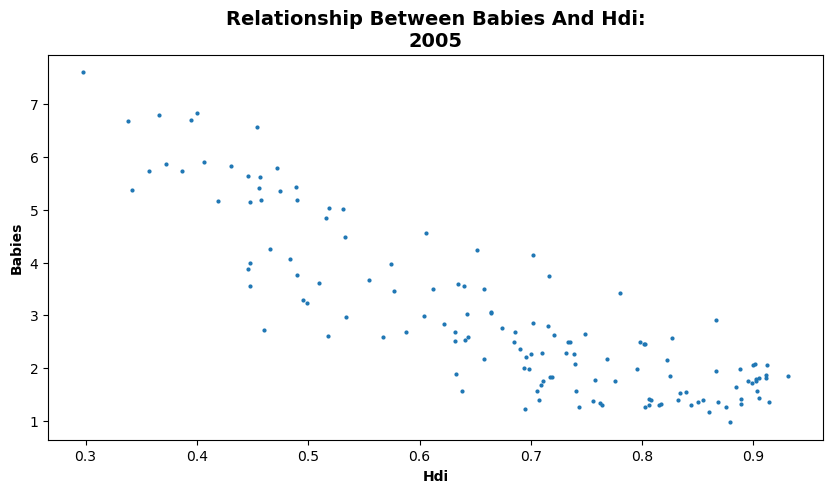

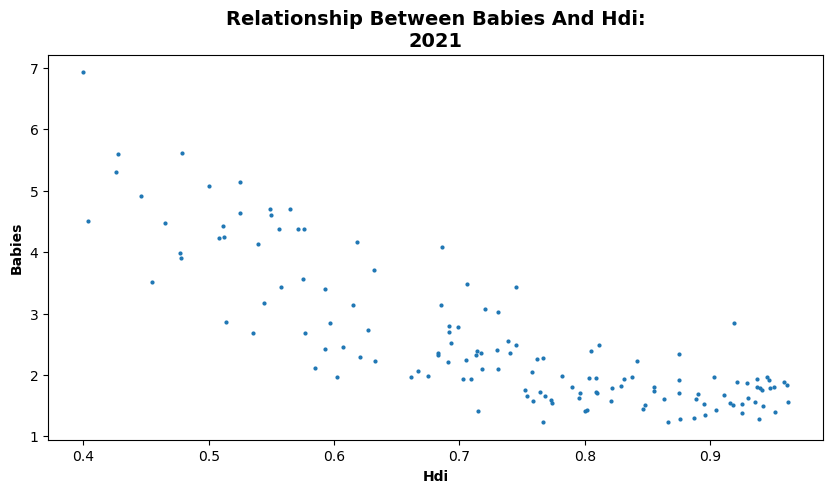

In [303]:
for decade, year in zip(['19', '20', '20'], ['90', '05', '21']):
    myScatterPlot(babies_hdi_all,f'hdi{year}',f'babies{year}', title=f':\n{decade}{year}')

The correlation for these variables is pretty obvious: negative. But we will still explore the pearson r statistic which will tell us whether there actually is a negative correlation. 

In [118]:
#We can drop all the the NaN values to run our statistics tests. We need each value present for these.
babies_hdi_all.dropna(inplace=True)

In [119]:
stats.pearsonr(babies_hdi_all['babies90'], babies_hdi_all['hdi90'])

PearsonRResult(statistic=-0.8604243967057863, pvalue=3.093896956583809e-42)

In [120]:
stats.pearsonr(babies_hdi_all['babies05'], babies_hdi_all['hdi05'])

PearsonRResult(statistic=-0.8640373457929404, pvalue=5.7670955262505045e-43)

In [121]:
stats.pearsonr(babies_hdi_all['babies21'], babies_hdi_all['hdi21'])

PearsonRResult(statistic=-0.8237134550705358, pvalue=8.111623294935973e-36)

Here our PearsonR statistics tell us we do have negative correlations, which we can pretty clearly see in the scatter plots. This means that as HDI scores increase (closer to 1.0), the APBW decreases. Now we will take a quick look at the countries whose HDI score was below .5, but APBW is above 5 for 2021. 

In [161]:
filterhdi1 = babies_hdi_all["hdi21"] < .5
filterhdi2 = babies_hdi_all["babies21"] > 5

babies_hdi_all[filterhdi1 & filterhdi2]

,babies90,hdi90,babies05,hdi05,babies21,hdi21
country,,,,,,
Burundi,7.51,0.290,6.69,0.338,5.30,0.426
"Congo, Dem. Rep.",7.13,0.386,6.71,0.395,5.62,0.479
Mali,7.17,0.237,6.79,0.366,5.60,0.428
Niger,7.77,0.216,7.61,0.298,6.93,0.400


Although these countries have lower HDI scores, possibly they have higher happiness scores. Next we will take a look at the relationship between APBW and Happiness Scores. Maybe more babies correlates with more happiness.

## What is the relationship between average babies per woman and Happiness Scores?

In [123]:
#Looking at the statistics for our happiness dataset, in 2011 we have a lot of data, so we will use this year for our analysis. 
df_happiness.describe()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,27.000000,89.000000,101.000000,109.000000,112.000000,122.000000,144.000000,139.000000,135.000000,143.000000,141.000000,140.000000,146.000000,140.000000,142.000000,115.000000,121.000000,136.000000
mean,64.466667,51.966292,54.212871,54.175229,54.584821,55.067213,54.320139,54.448921,53.883704,53.893007,54.029078,53.940714,54.555479,54.924286,55.648592,57.225217,56.281818,55.333824
std,9.183095,10.940437,10.520463,11.748602,10.370846,11.319642,10.896407,11.285584,11.876537,11.622632,11.235521,11.478387,11.433894,10.886682,11.177413,9.922390,11.398984,11.417889
min,47.200000,32.000000,32.800000,28.100000,34.100000,32.300000,29.400000,31.600000,26.900000,28.400000,27.000000,26.900000,26.600000,26.900000,23.800000,26.300000,21.800000,18.600000
25%,55.400000,44.600000,46.700000,46.000000,46.550000,46.200000,46.950000,45.850000,45.050000,44.900000,46.100000,45.175000,46.200000,47.625000,49.150000,49.800000,49.200000,47.000000
50%,66.200000,50.800000,52.200000,51.700000,53.600000,54.750000,52.500000,53.100000,52.400000,53.300000,53.400000,54.050000,55.150000,54.450000,55.950000,57.700000,57.500000,56.700000
75%,71.600000,59.500000,61.400000,62.600000,62.725000,63.400000,63.425000,62.450000,63.350000,62.800000,63.200000,61.450000,62.600000,62.425000,62.700000,64.200000,64.400000,63.300000
max,80.200000,76.700000,78.300000,79.700000,76.800000,77.700000,77.900000,77.800000,75.900000,75.100000,76.000000,76.600000,77.900000,78.600000,77.800000,78.900000,77.900000,78.000000


In [124]:
#Merging datasets
df_merge_babieshappy = df_babies.merge(df_happiness, left_index=True, right_index=True, how = 'inner')
df_merge_babieshappy

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2013_y,2014_y,2015_y,2016_y,2017_y,2018_y,2019_y,2020_y,2021_y,2022_y
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,35.7,31.3,39.8,42.2,26.6,26.9,23.8,NaN,24.4,18.6
Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,6.94,...,39.4,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,45.5,48.1,46.1,45.1,46.4,50.0,50.0,53.6,52.5,52.8
UAE,6.94,6.94,6.94,6.94,6.94,6.94,6.94,6.94,6.94,6.94,...,66.2,65.4,65.7,68.3,70.4,66.0,67.1,64.6,67.3,65.7
Argentina,6.80,6.80,6.80,6.80,6.80,6.80,6.80,6.80,6.80,6.80,...,65.8,66.7,67.0,64.3,60.4,57.9,60.9,59.0,59.1,60.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,4.70,4.70,4.70,4.70,4.70,4.70,4.70,4.70,4.70,4.70,...,50.2,50.9,50.8,50.6,51.8,53.0,54.7,54.6,55.4,57.6
Yemen,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,...,42.2,39.7,29.8,38.3,32.5,30.6,42.0,NaN,NaN,NaN
South Africa,6.47,6.47,6.47,6.47,6.47,6.47,6.47,6.47,6.47,6.47,...,36.6,48.3,48.9,47.7,45.1,48.8,50.4,49.5,56.0,52.8


In [125]:
#Extracting the columns we want from our merged dataset. 
babies_happiness_all = df_merge_babieshappy[['2011_x', '2011_y', '2015_x', '2015_y', '2022_x', '2022_y']].copy()
babies_happiness_all

,2011_x,2011_y,2015_x,2015_y,2022_x,2022_y
country,,,,,,
Afghanistan,5.60,38.3,4.80,39.8,3.77,18.6
Angola,6.08,55.9,5.77,NaN,5.28,NaN
Albania,1.67,58.7,1.71,46.1,1.70,52.8
UAE,1.84,71.2,1.77,65.7,1.66,65.7
Argentina,2.36,67.8,2.31,67.0,2.20,60.2
...,...,...,...,...,...,...
Vietnam,1.95,57.7,1.96,50.8,1.93,57.6
Yemen,4.55,37.5,4.10,29.8,3.44,NaN
South Africa,2.57,49.3,2.49,48.9,2.31,52.8


In [126]:
#Renaming our columns so they are easier to understand.
babies_happiness_all.rename(columns={'2011_x': 'babies11', '2011_y': 'happy11', '2015_x': 'babies15', '2015_y':'happy15', '2022_x':'babies22', '2022_y':'happy22'}, inplace=True)
babies_happiness_all

,babies11,happy11,babies15,happy15,babies22,happy22
country,,,,,,
Afghanistan,5.60,38.3,4.80,39.8,3.77,18.6
Angola,6.08,55.9,5.77,NaN,5.28,NaN
Albania,1.67,58.7,1.71,46.1,1.70,52.8
UAE,1.84,71.2,1.77,65.7,1.66,65.7
Argentina,2.36,67.8,2.31,67.0,2.20,60.2
...,...,...,...,...,...,...
Vietnam,1.95,57.7,1.96,50.8,1.93,57.6
Yemen,4.55,37.5,4.10,29.8,3.44,NaN
South Africa,2.57,49.3,2.49,48.9,2.31,52.8


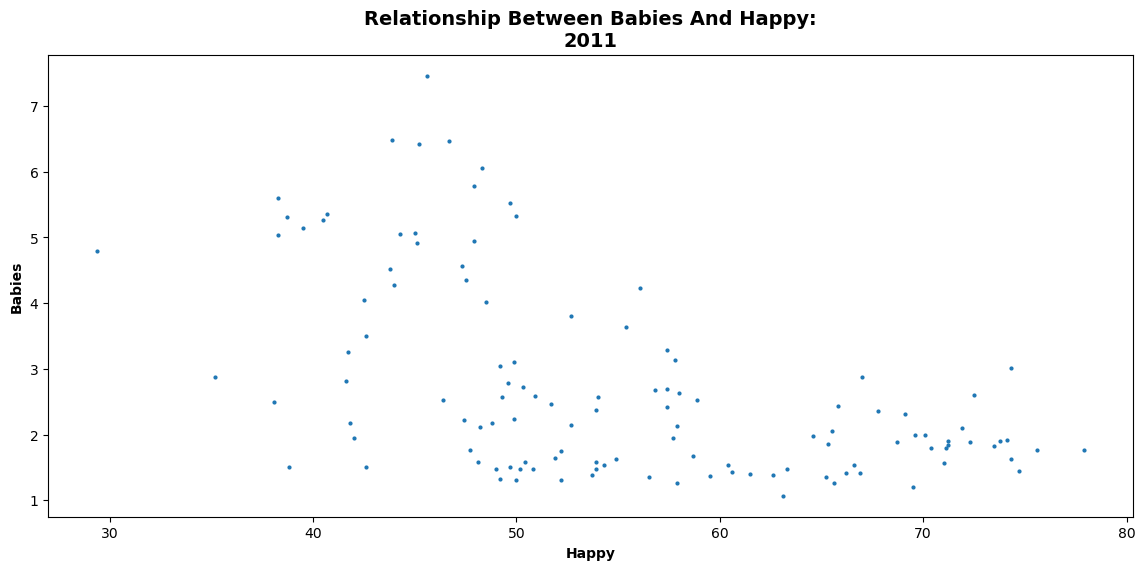

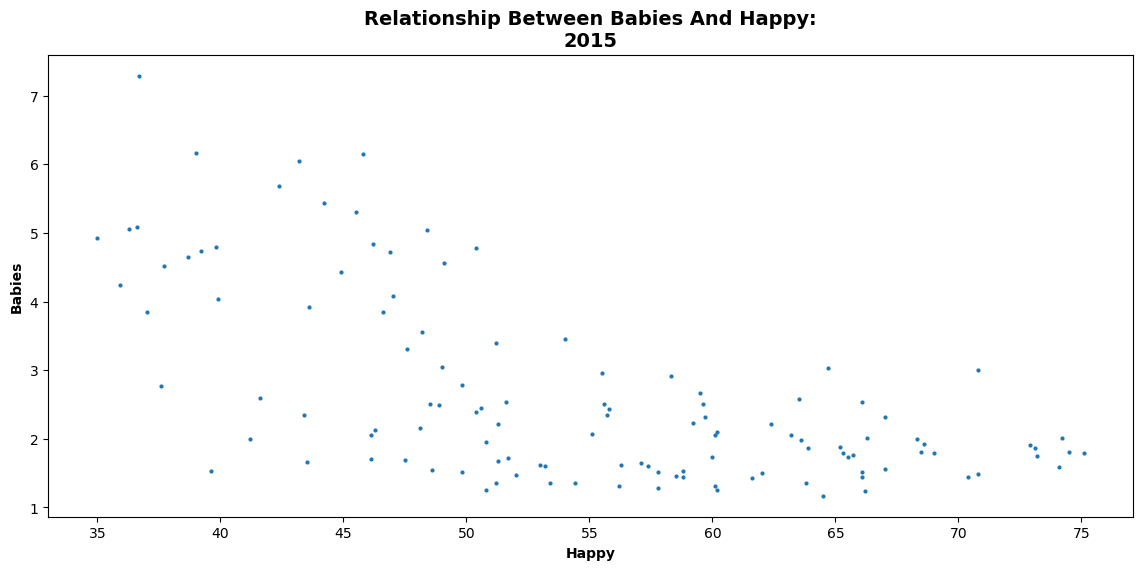

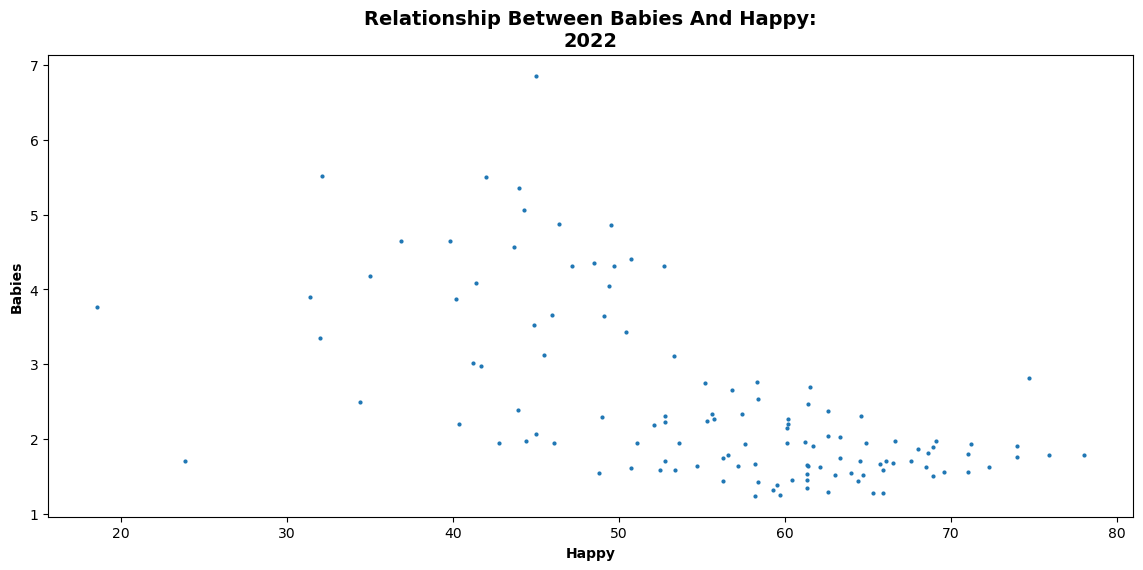

In [286]:
for decade, year in zip(['20', '20', '20'], ['11', '15', '22']):
    myScatterPlot(babies_happiness_all,f'happy{year}',f'babies{year}', title=f':\n{decade}{year}')

These scatter plot trends don't seem as obvious as the HDI scatterplots, though there does still seem to be a negative correlation. Let's take a look at our statistics to see whether there actually is a correlation. 

In [128]:
#Dropping the NaN values for our statistical computations.
babies_happiness_all.dropna(inplace=True)
babies_happiness_all

,babies11,happy11,babies15,happy15,babies22,happy22
country,,,,,,
Afghanistan,5.60,38.3,4.80,39.8,3.77,18.6
Albania,1.67,58.7,1.71,46.1,1.70,52.8
UAE,1.84,71.2,1.77,65.7,1.66,65.7
Argentina,2.36,67.8,2.31,67.0,2.20,60.2
Armenia,1.50,42.6,1.66,43.5,1.58,53.4
...,...,...,...,...,...,...
Venezuela,2.44,65.8,2.34,55.7,2.18,52.1
Vietnam,1.95,57.7,1.96,50.8,1.93,57.6
South Africa,2.57,49.3,2.49,48.9,2.31,52.8


In [129]:
stats.pearsonr(babies_happiness_all['babies11'], babies_happiness_all['happy11'])

PearsonRResult(statistic=-0.535261133242092, pvalue=3.0060951011677324e-10)

In [130]:
stats.pearsonr(babies_happiness_all['babies15'], babies_happiness_all['happy15'])

PearsonRResult(statistic=-0.6285917440286989, pvalue=1.511808227291475e-14)

In [131]:
stats.pearsonr(babies_happiness_all['babies22'], babies_happiness_all['happy22'])

PearsonRResult(statistic=-0.6103726885744369, pvalue=1.3506940902293603e-13)

Our PearsonR statistics tell us each graph does have a negative correlation. This means that countries where the APBW is lower, Happiness scores are higher. Let's take a look at the happiest countries.

In [171]:
#Start by looking at countries who are above the 75th percentile for happiness
babies_happiness_all['happy15'].describe()

count    120.000000
mean      54.623333
std       10.508098
min       35.000000
25%       46.825000
50%       54.200000
75%       63.525000
max       75.100000
Name: happy15, dtype: float64

In [188]:
#Filter countries whose happiness score in 2015 was above 63.5 
#We are using 2015 because we will be looking at a comparison of 2014 suicide rates and 2015 happiness scores
filterhappy = babies_happiness_all["happy15"] > 63.5


babies_happiness_all[filterhappy]

,babies11,happy11,babies15,happy15,babies22,happy22
country,,,,,,
UAE,1.84,71.2,1.77,65.7,1.66,65.7
Argentina,2.36,67.8,2.31,67.0,2.20,60.2
Australia,1.92,74.1,1.86,73.1,1.80,71.0
Austria,1.44,74.7,1.49,70.8,1.56,71.0
Belgium,1.80,71.1,1.79,69.0,1.81,68.6
Brazil,1.79,70.4,1.74,65.5,1.65,61.3
Canada,1.63,74.3,1.59,74.1,1.56,69.6
Chile,1.86,65.3,1.79,65.3,1.74,63.3
Colombia,1.98,64.6,1.87,63.9,1.75,56.3


Here are our countries with happiness scores above 63.5, or the 75th percentile. That means the average person in these countries answered 7 to the survey question. As you can see, most countries have the APBW below 2, except for Israel at 2.82. Because this survey is subjective, I want to take a look at suicide rates to see if that data tells a different story about maybe a couple of these countries. 

## What is the relationship between average babies per woman and suicide rates?

In [146]:
#This will give us an idea of which years to analyze. The more value counts, the better the data.
df_suicide.describe()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,10.000000,17.000000,20.000000,21.000000,22.000000,31.000000,31.000000,32.000000,34.000000,34.000000,...,52.000000,53.000000,51.000000,50.000000,55.000000,51.000000,50.000000,50.000000,40.000000,14.000000
mean,9.999000,10.506471,11.321500,11.838095,12.225000,11.553323,11.797355,11.252031,10.936938,11.039412,...,9.746546,9.609960,10.064843,9.624820,9.045945,9.431784,9.843792,9.064928,9.546695,10.057143
std,5.792266,6.022625,5.808871,6.189321,6.402491,6.793930,6.780083,6.875108,6.980105,6.686588,...,5.726606,6.129911,6.301887,5.966061,5.805576,5.386623,5.620760,5.426189,5.004032,5.153779
min,2.580000,2.600000,2.140000,2.080000,2.020000,0.233000,0.268000,0.154000,0.085900,0.200000,...,0.045400,0.066900,0.159000,0.150000,0.115000,0.104000,0.073600,0.068400,0.057800,1.850000
25%,8.137500,6.300000,6.452500,6.930000,7.035000,6.710000,6.970000,6.392500,5.957500,6.910000,...,5.555000,5.500000,5.885000,5.557500,5.125000,5.595000,6.260000,5.585000,6.437500,7.572500
50%,8.735000,9.070000,9.990000,9.710000,10.450000,9.720000,10.300000,9.620000,9.795000,9.455000,...,9.805000,9.430000,9.620000,9.675000,8.780000,9.190000,9.710000,8.850000,9.410000,9.875000
75%,10.677500,13.500000,15.175000,16.400000,16.825000,16.700000,17.150000,16.650000,14.800000,15.575000,...,13.075000,12.600000,13.250000,13.000000,11.650000,12.250000,12.500000,12.275000,12.250000,12.375000
max,24.400000,22.400000,22.000000,23.700000,26.400000,28.100000,27.200000,26.600000,27.600000,25.000000,...,27.400000,30.100000,30.400000,27.600000,28.000000,25.700000,30.900000,26.100000,25.200000,22.900000


In [147]:
#Like the other analyses, we merge our two datasets
df_merge_babiessuicide = df_babies.merge(df_suicide, left_index=True, right_index=True, how = 'inner')
df_merge_babiessuicide

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007_y,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y
country,,,,,,,,,,,,,,,,,,,,,
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,4.06,5.340,NaN,3.08,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,6.80,6.80,6.80,6.80,6.80,6.80,6.80,6.80,6.80,6.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Armenia,7.80,7.80,7.81,7.81,7.81,7.82,7.82,7.82,7.83,7.83,...,NaN,1.740,NaN,NaN,NaN,2.39,1.92,1.54,2.02,1.85
Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,4.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,6.50,6.48,6.46,6.44,6.42,6.40,6.38,6.36,6.34,6.32,...,9.71,9.960,9.62,9.82,9.73,10.30,10.20,11.20,11.60,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,5.71,5.71,5.71,5.71,5.71,5.71,5.71,5.71,5.71,5.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
St. Vincent and the Grenadines,6.54,6.54,6.54,6.54,6.54,6.54,6.54,6.54,6.54,6.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Venezuela,5.63,5.63,5.64,5.64,5.64,5.65,5.65,5.65,5.66,5.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
#Now we take a copy of the columns we want.
babies_suicide_all = df_merge_babiessuicide[['1990_x','1990_y', '2005_x', '2005_y', '2014_x', '2014_y']].copy()
babies_suicide_all

,1990_x,1990_y,2005_x,2005_y,2014_x,2014_y
country,,,,,,
Albania,2.98,NaN,1.75,NaN,1.71,NaN
Argentina,2.99,6.79,2.45,NaN,2.32,NaN
Armenia,2.54,3.02,1.40,NaN,1.69,1.54
Antigua and Barbuda,2.06,NaN,2.22,NaN,2.08,NaN
Australia,1.88,12.20,1.86,NaN,1.87,11.20
...,...,...,...,...,...,...
Uzbekistan,4.21,9.44,2.46,5.21,2.34,NaN
St. Vincent and the Grenadines,2.96,NaN,2.17,NaN,1.98,NaN
Venezuela,3.45,6.22,2.63,NaN,2.37,NaN


In [149]:
#Renaming 
babies_suicide_all.rename(columns={'1990_x': 'babies90', '1990_y': 'suicide90', '2005_x': 'babies05', '2005_y':'suicide05', '2014_x':'babies14', '2014_y':'suicide14'}, inplace=True)
babies_suicide_all

,babies90,suicide90,babies05,suicide05,babies14,suicide14
country,,,,,,
Albania,2.98,NaN,1.75,NaN,1.71,NaN
Argentina,2.99,6.79,2.45,NaN,2.32,NaN
Armenia,2.54,3.02,1.40,NaN,1.69,1.54
Antigua and Barbuda,2.06,NaN,2.22,NaN,2.08,NaN
Australia,1.88,12.20,1.86,NaN,1.87,11.20
...,...,...,...,...,...,...
Uzbekistan,4.21,9.44,2.46,5.21,2.34,NaN
St. Vincent and the Grenadines,2.96,NaN,2.17,NaN,1.98,NaN
Venezuela,3.45,6.22,2.63,NaN,2.37,NaN


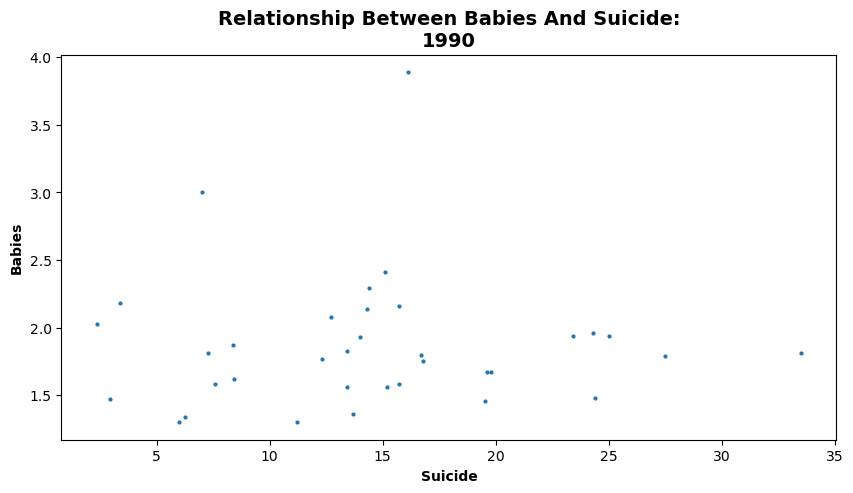

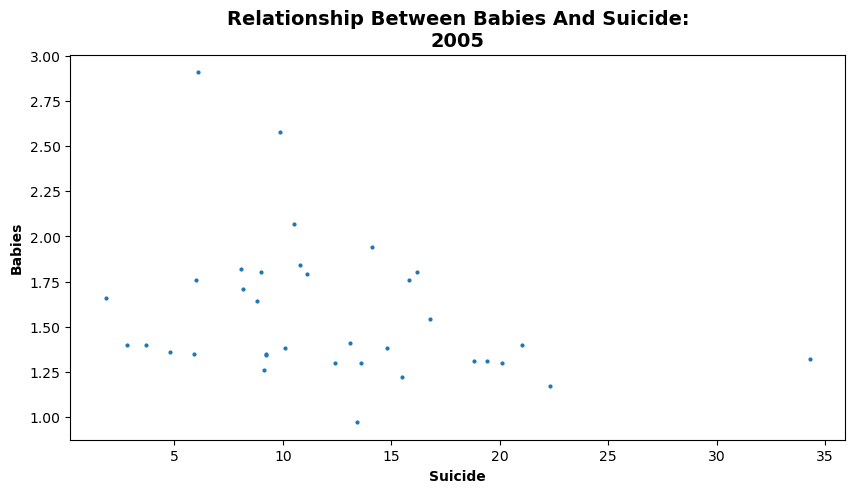

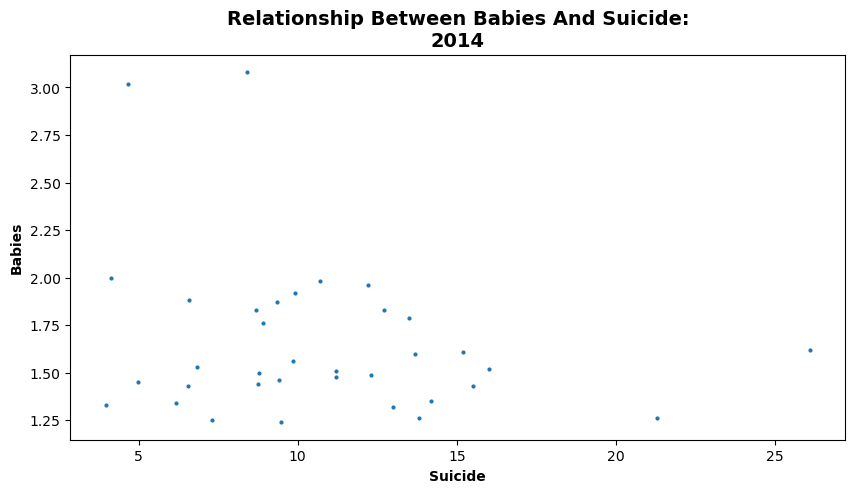

In [291]:
for decade, year in zip(['19', '20', '20'], ['90', '05', '14']):
    myScatterPlot(babies_suicide_all,f'suicide{year}',f'babies{year}', title=f':\n{decade}{year}')

It's hard to tell whether there's any relationship between the two variables with these two scatterplots. Let's take a look at our statistics to tell us if there is a negative, positive, or now correlation. 

In [226]:
#Dropping our NaN values so we can run our statistical tests
babies_suicide_all.dropna(inplace=True)
babies_suicide_all

,babies90,suicide90,babies05,suicide05,babies14,suicide14
country,,,,,,
Austria,1.46,19.50,1.41,13.10,1.48,11.20
Belgium,1.58,15.70,1.76,15.80,1.79,13.50
Bulgaria,1.77,12.30,1.34,9.22,1.53,6.85
Czech Republic,1.80,16.70,1.30,12.40,1.51,11.20
Germany,1.36,13.70,1.35,9.21,1.44,8.76
Denmark,1.67,19.60,1.80,8.97,1.83,8.69
Spain,1.34,6.25,1.35,5.89,1.34,6.19
Estonia,1.94,25.00,1.54,16.80,1.61,15.20
Finland,1.79,27.50,1.80,16.20,1.83,12.70


In [227]:
stats.pearsonr(babies_suicide_all['babies90'], babies_suicide_all['suicide90'])

PearsonRResult(statistic=0.01063639543842686, pvalue=0.9516442529946668)

In [228]:
stats.pearsonr(babies_suicide_all['babies05'], babies_suicide_all['suicide05'])

PearsonRResult(statistic=-0.2975117577241621, pvalue=0.08261172197971714)

In [229]:
stats.pearsonr(babies_suicide_all['babies14'], babies_suicide_all['suicide14'])

PearsonRResult(statistic=-0.23894164328235468, pvalue=0.16685539427925256)

Our statistics show us what we expected to see. Little correlation between these two variables. One factor to consider, however, is the reduced size of the dataframe. We only have around 30 countries to run statistics on. This may not be enough to show a strong relationship. If we had more data from other countries, our results may be different. 

## Which countries, if any, have a higher happiness score **AND** a higher suicide rate (above 75th percentile)?

We aren't going to focus on APBW anymore, only countries who score higher in happiness level and countries with higher suicide rates. We will look at the year 2014. First, we use .describe() to find the 75th percentile for both datasets.

In [194]:
df_happiness['2014'].describe()

count    143.000000
mean      53.893007
std       11.622632
min       28.400000
25%       44.900000
50%       53.300000
75%       62.800000
max       75.100000
Name: 2014, dtype: float64

In [217]:
df_suicide['2014'].describe()

count    50.000000
mean      9.064928
std       5.426189
min       0.068400
25%       5.585000
50%       8.850000
75%      12.275000
max      26.100000
Name: 2014, dtype: float64

Now we filter our datasets from 2014. We will look at all countries whose suicide rate per 100k was above 12.275, and countries whose happiness score was above 62.8.

In [223]:
filtersuicide = df_suicide['2014'] > 12.275
filterhappy = df_happiness['2014'] > 62.8

In [224]:
df_suicide[filtersuicide]

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Belgium,NaN,NaN,NaN,NaN,11.3,11.0,12.0,12.0,12.1,10.80,...,14.2,15.4,15.3,15.3,15.4,14.8,13.7,13.5,13.3,NaN
Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.2,15.2,16.2,13.6,13.1,13.9,12.6,15.2,12.4,NaN
Finland,NaN,NaN,18.4,18.2,19.8,20.9,23.3,22.9,22.1,20.90,...,16.3,17.1,17.0,15.8,14.8,14.1,14.3,12.7,NaN,NaN
Croatia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.9,13.0,13.0,12.7,11.4,13.1,12.2,12.3,12.2,11.4
Hungary,NaN,NaN,NaN,NaN,NaN,20.5,19.3,21.2,23.0,25.00,...,18.4,18.6,19.0,18.7,18.3,17.4,15.3,14.2,13.7,12.7
Japan,24.4,22.3,22.0,23.7,26.4,28.1,27.2,26.6,27.6,24.60,...,18.8,18.8,19.1,18.3,18.2,16.6,16.3,15.5,14.5,NaN
Kazakhstan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.5,18.0,16.4,NaN
South Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.8,22.4,26.3,25.9,25.9,22.6,22.5,21.3,20.2,NaN
Lithuania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.4,30.1,30.4,27.6,28.0,25.7,30.9,26.1,25.2,22.9


In [225]:
df_happiness[filterhappy]

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
country,,,,,,,,,,,,,,,,,,
UAE,NaN,67.3,NaN,NaN,68.7,71.0,71.2,72.2,66.2,65.4,65.7,68.3,70.4,66.0,67.1,64.6,67.3,65.7
Argentina,NaN,63.1,60.7,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9,60.9,59.0,59.1,60.2
Australia,73.4,NaN,72.8,72.5,NaN,74.5,74.1,72.0,73.6,72.9,73.1,72.5,72.6,71.8,72.3,71.4,71.1,71.0
Austria,NaN,71.2,NaN,71.8,NaN,73.0,74.7,74.0,75.0,69.5,70.8,70.5,72.9,74.0,72.0,72.1,70.8,71.0
Belgium,72.6,NaN,72.2,71.2,NaN,68.5,71.1,69.3,71.0,68.5,69.0,69.5,69.3,68.9,67.7,68.4,68.8,68.6
Brazil,66.4,NaN,63.2,66.9,70.0,68.4,70.4,66.6,71.4,69.8,65.5,63.8,63.3,61.9,64.5,61.1,60.1,61.3
Canada,74.2,NaN,74.8,74.9,74.9,76.5,74.3,74.2,75.9,73.0,74.1,72.5,74.2,71.8,71.1,70.3,69.4,69.6
Switzerland,NaN,74.7,NaN,NaN,75.3,NaN,NaN,77.8,NaN,74.9,75.7,74.6,74.7,75.1,76.9,75.1,73.3,72.4
Chile,NaN,60.6,57.0,57.9,64.9,66.4,65.3,66.0,67.4,68.4,65.3,65.8,63.2,64.4,59.4,61.5,64.4,63.3


The two countries that show up in both filtered dataframes are **Finland** and **Belgium**. This tells us that although these countries ranked higher in happiness scores, their suicide rates were also above the 75th percentile. Subjectively, the people may be happier, but objectively it doesn't seem so. While we don't really know why this is, it is still interesting to see the discrepancies. 

<a id='conclusions'></a>
## Conclusions

In this analysis, we looked at Average Babies per Woman (APBW) and three different factors: the Health Development Index (HDI), Happiness scores, and suicide rates per 100k people. We also briefly looked at countries who scored high in both happiness and suicide. Our analyses show us correlations among these aforementioned factors. In countries where the HDI score is lower, women tend to have more babies and where the HDI is higher, women tend to have fewer babies. Thus we see a negative (or inverse) correlation. Next, we looked at happiness and APBW. We also see an inverse relationship here. Where we find happier people, women have fewer babies and countries who scored lower in happiness tended to have more babies. Our final correlational analyses was between APBW and suicide rates. This analysis showed little or no relationship between these variables. Lastly, we found two countries who were above the 75th percentile in happiness score and suicide rates: Finland and Belgium. While we do not know why this may be, it is interesting to speculate. In conclusion, there are more babies in countries that have a lower HDI score and lower happiness. And fewer babies where there is more happiness and a higher HDI. Our analyses do not imply any causal relationships. 

### Limitation

There are plenty of limitations to each of these explorations. 

First, it is difficult to ascertain data integrity. The kinds of people asked to do the survey in each country may not represent the country as a whole, probably but most likely third world countries with remote populations. It also may be the case that the time of year affects how people answer the survey. For example, asking people in Finland about happiness in the summer vs winter may yield different results due to how much sunlight people are receiving. While it is complex to control variables for these kinds of surveys, they do give us a general idea of how each country does as a whole. 

Second, there is consistent lack of data for the same countries. Countries such as Angola, Qatar, Syria, and Yemen have little data for happiness scores and suicide rates. It is important to include such countries in analyses. We have multitudes of data from countries such as the US, France, England, etc., but it would be very helpful to have multitudes of data about countries all accross the spectrum. Along with this, some years have much fewer data than others. For this reason, we had to look at different years for each analysis. 

Third, no in depth statistical analyses were ran. I cannot make any definitive conclusions because my statistical analyses were slim. I can talk about relationships and correlations, but beyond that there is not much information. Hopefully in the future I will be able to run more statistical tests and make more dramatic conclusions. 


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [231]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'Investigate_a_Dataset.ipynb' matched no files


255